In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0-rc0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [6]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [9]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
np.max(X_train)

255

In [11]:
np.mean(X_train)

72.94035223214286

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Data Exploration

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

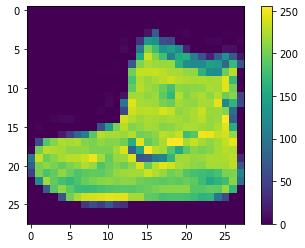

In [15]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [18]:
X_train = X_train/255.0
X_test = X_test/255.0

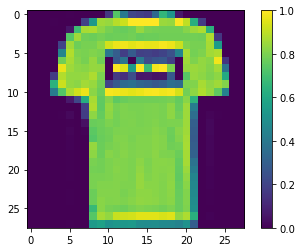

In [19]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

#### Build the model with TF 2.0

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [21]:
model = Sequential()
model.add(Flatten(input_shape = [28, 28]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
* loss
* optimizer
* metrics

In [23]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 28us/sample - loss: 0.5568 - accuracy: 0.8077 - val_loss: 0.4547 - val_accuracy: 0.8358
Epoch 2/10
48000/48000 [==============================] - 1s 17us/sample - loss: 0.4090 - accuracy: 0.8566 - val_loss: 0.4156 - val_accuracy: 0.8514
Epoch 3/10
48000/48000 [==============================] - 1s 17us/sample - loss: 0.3693 - accuracy: 0.8679 - val_loss: 0.3659 - val_accuracy: 0.8712
Epoch 4/10
48000/48000 [==============================] - 1s 17us/sample - loss: 0.3405 - accuracy: 0.8779 - val_loss: 0.3702 - val_accuracy: 0.8668
Epoch 5/10
48000/48000 [==============================] - 1s 17us/sample - loss: 0.3204 - accuracy: 0.8843 - val_loss: 0.3456 - val_accuracy: 0.8762
Epoch 6/10
48000/48000 [==============================] - 1s 17us/sample - loss: 0.3066 - accuracy: 0.8886 - val_loss: 0.3384 - val_accuracy: 0.8787
Epoch 7/10
48000/48000 [==============================] 

In [25]:
# test_loss, test_acc = model.evaluate(X_test, y_test)

In [26]:
# print(test_acc)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_pred = model.predict_classes(X_test)

In [29]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [30]:
accuracy_score(y_test, y_pred)

0.8759

In [31]:
pred = model.predict(X_test)

In [32]:
pred

array([[1.4298773e-05, 6.6825848e-08, 3.8475669e-06, ..., 7.9389093e-03,
        1.0096505e-05, 9.8649782e-01],
       [1.6806940e-05, 3.1754446e-09, 9.8936951e-01, ..., 7.1369016e-10,
        2.1132049e-09, 1.3683065e-14],
       [7.1809359e-06, 9.9999154e-01, 4.8081450e-08, ..., 1.5418533e-10,
        1.4075823e-09, 9.4700650e-11],
       ...,
       [8.5800741e-04, 1.0930863e-10, 3.0891169e-03, ..., 9.2069581e-07,
        9.9312866e-01, 9.2437369e-10],
       [3.1933848e-06, 9.9957222e-01, 3.9319148e-06, ..., 2.7374043e-07,
        1.7738522e-08, 1.3727303e-07],
       [1.3251232e-05, 1.0207909e-06, 1.2523242e-05, ..., 4.0395600e-03,
        1.3113342e-04, 3.0150304e-05]], dtype=float32)

In [33]:
pred[0]

array([1.4298773e-05, 6.6825848e-08, 3.8475669e-06, 7.9034557e-08,
       1.7082847e-07, 5.5010384e-03, 3.3679389e-05, 7.9389093e-03,
       1.0096505e-05, 9.8649782e-01], dtype=float32)

In [34]:
np.argmax(pred[0])

9

In [35]:
np.argmax(pred[1])

2

### Plotting Learning Curve and Confusion Matrix in TensorFlow 2.0

In [36]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.co

In [37]:
history.history

{'loss': [0.5567693452971677,
  0.40903920847922565,
  0.36928971220428747,
  0.3405360111966729,
  0.3204271617345512,
  0.3066189068990449,
  0.2902425254384677,
  0.2781753165957828,
  0.2690588237096866,
  0.261490772323062],
 'accuracy': [0.80766666,
  0.85658336,
  0.867875,
  0.877875,
  0.88427085,
  0.8885625,
  0.8949375,
  0.89847916,
  0.9010208,
  0.90422916],
 'val_loss': [0.4547358403603236,
  0.41563998684287073,
  0.3659448670844237,
  0.3702130539963643,
  0.34556414696077503,
  0.3383848602573077,
  0.33440448182324567,
  0.3380819338063399,
  0.3258256105085214,
  0.3253447736303012],
 'val_accuracy': [0.8358333,
  0.85141665,
  0.87116665,
  0.8668333,
  0.87616664,
  0.87866664,
  0.8793333,
  0.8779167,
  0.88375,
  0.88341665]}

In [38]:
import matplotlib.pyplot as plt

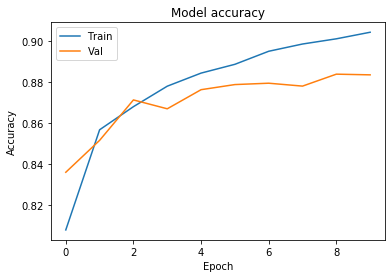

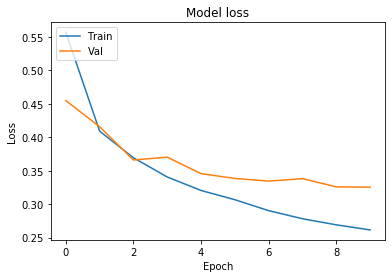

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()



### Plot confusion Matrix

In [40]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 800x800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fda918a8ba8>)

W0903 11:37:21.345664 4488730048 font_manager.py:1282] findfont: Font family ['Time New Roman'] not found. Falling back to DejaVu Sans.
W0903 11:37:21.365536 4488730048 font_manager.py:1282] findfont: Font family ['Time New Roman'] not found. Falling back to DejaVu Sans.


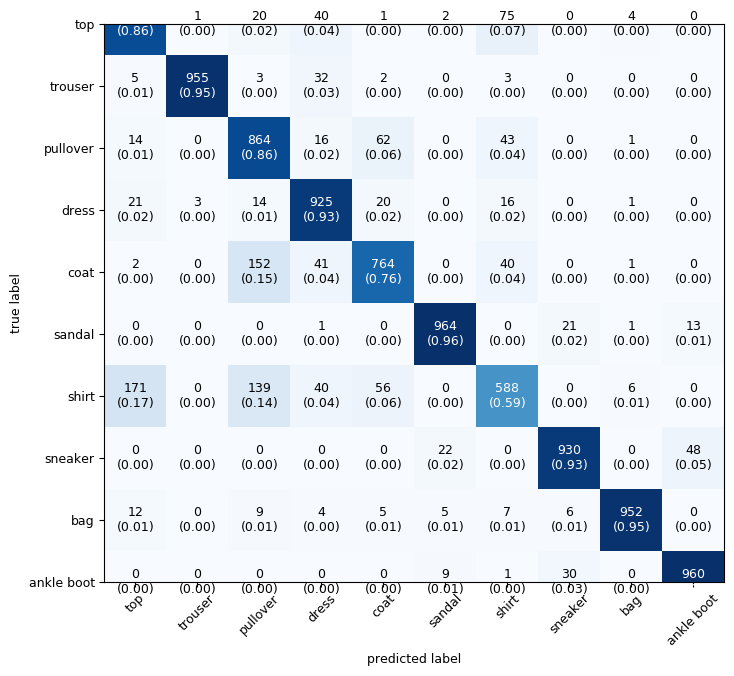

In [41]:
## reset the matplotlib settings
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

font = {
    'family': 'Time New Roman',
    'weight': 'regular',
    'size': 9
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, 
                      figsize=(8, 8), 
                      class_names=class_names, 
                      show_normed=True
                     )